In [25]:
import csv
from collections import defaultdict
from collections import Counter
import datetime as dt
import scipy.stats as stats
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
summer_months = [6,7,8,9]

## setting up 

In [3]:
counties_2019 = set()
historical_counties = set()

county_level_cases_2019 = ""
pre_2019_positives = ""

with open(county_level_cases_2019) as f:
    data = csv.DictReader(f)
    for l in data:
        if l['animal'] == "Human":
            counties_2019.add(l['county'])


with open(pre_2019_positives) as f:
    data = csv.DictReader(f)
    for l in data:
        if l['species'] == "human":
            historical_counties.add(l['county'])
            

In [4]:
county_to_code = {}
fips_codes = ""
with open(fips_codes) as f:
    data = csv.DictReader(f)
    for l in data:
        county_to_code[l['county'].replace(" County","").replace(" ","_")] = l['code']

In [5]:
for i in counties_2019:
    if i not in county_to_code:
        print(i)
for i in historical_counties:
    if i not in county_to_code:
        print(i)

In [6]:
indoor_outdoorness_file = ""

def pull_movement(year, wanted_counties):
    
    county_to_indoor = defaultdict(list)
    
    with open(indoor_outdoorness_file_{year}) as f:
        data = csv.DictReader(f)
        for l in data:
            if l['countyFIPS'] in wanted_counties:
                date = dt.datetime.strptime(l['date'], "%Y-%m-%d")
                if date.month in summer_months:
                    if l['indoor_activity'] != "":
                        county_to_indoor[l['countyFIPS']].append(float(l['indoor_activity']))
    
    return county_to_indoor
    

## all counties that have ever had a case

In [19]:
all_counties = set()
for i in counties_2019:
    all_counties.add(county_to_code[i])
for i in historical_counties:
    all_counties.add(county_to_code[i])

In [20]:
county_to_indoor_2018 = pull_movement(2018, all_counties)
county_to_indoor_2019 = pull_movement(2019, all_counties)

In [21]:
all_averages_2018 = []
all_averages_2019 = []

for i,j in county_to_indoor_2018.items():
    all_averages_2018.append(np.mean(j))
    all_averages_2019.append(np.mean(county_to_indoor_2019[i]))

In [22]:
stats.ttest_rel(all_averages_2018, all_averages_2019)

Ttest_relResult(statistic=-0.6022218740860936, pvalue=0.557384962450989)

## counties that had a human case in 2019

In [11]:
county_codes_2019 = set()
for i in counties_2019:
    county_codes_2019.add(county_to_code[i])

In [12]:
county_to_indoor_2018 = pull_movement(2018, county_codes_2019)
county_to_indoor_2019 = pull_movement(2019, county_codes_2019)

In [13]:
averages_2018 = []
averages_2019 = []

for i,j in county_to_indoor_2018.items():
    averages_2018.append(np.mean(j))
    averages_2019.append(np.mean(county_to_indoor_2019[i]))

In [14]:
stats.ttest_rel(averages_2018, averages_2019)

Ttest_relResult(statistic=-0.36870939934196406, pvalue=0.7219109993245627)

## figure

In [27]:
df_dict = defaultdict(list)

for i in all_averages_2018:
    df_dict["type"].append("ever_had_a_case")
    df_dict["year"].append("2018")
    df_dict['value'].append(i)
for i in all_averages_2019:
    df_dict["type"].append("ever_had_a_case")
    df_dict["year"].append("2019")
    df_dict['value'].append(i)
for i in averages_2018:
    df_dict["type"].append("had_a_case_in_2019")
    df_dict["year"].append("2018")
    df_dict['value'].append(i)
for i in averages_2019:
    df_dict["type"].append("had_a_case_in_2019")
    df_dict["year"].append("2019")
    df_dict['value'].append(i)
    
df = pd.DataFrame(df_dict)

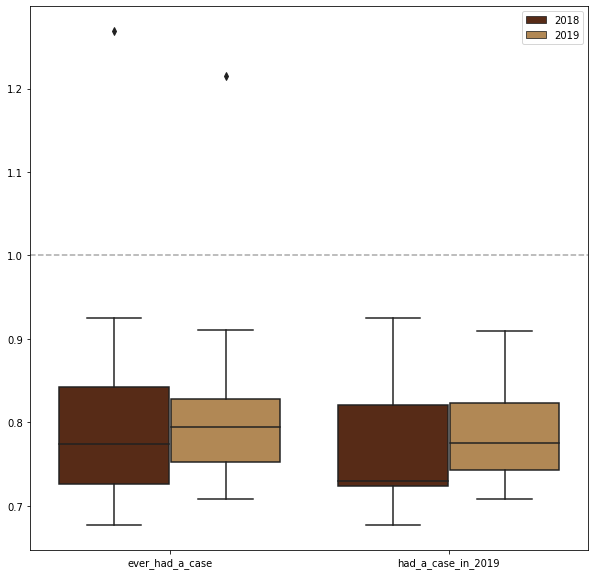

In [38]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

colours = {"2018":"#62270C", "2019":"#C08A46"}

sns.boxplot(ax=ax, data=df_dict, x="type", y="value", hue="year", palette=colours)

ax.axhline(y=1, color="darkgrey", linestyle="--")

